<a href="https://colab.research.google.com/github/intellizone/Share-Market/blob/main/ShareMarket_Udemy_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_ta

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the stock symbol and timeframe
symbol = 'IRFC.NS'
end_date = datetime.today()
start_date = end_date - timedelta(days=120)  # 4 months before today

# Fetch stock data using yfinance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate technical indicators using pandas-ta
stock_data.ta.macd(append=True)
stock_data.ta.rsi(append=True)
stock_data.ta.bbands(append=True)
stock_data.ta.obv(append=True)

# Calculate additional technical indicators
stock_data.ta.sma(length=20, append=True)
stock_data.ta.ema(length=50, append=True)
stock_data.ta.stoch(append=True)
stock_data.ta.adx(append=True)

# Calculate other indicators
stock_data.ta.willr(append=True)
stock_data.ta.cmf(append=True)
stock_data.ta.psar(append=True)

#convert OBV to million
stock_data['OBV_in_million'] =  stock_data['OBV']/1e7
stock_data['MACD_histogram_12_26_9'] =  stock_data['MACDh_12_26_9'] # not to confuse chatGTP

# Summarize technical indicators for the last day
last_day_summary = stock_data.iloc[-1][['Adj Close',
    'MACD_12_26_9','MACD_histogram_12_26_9', 'RSI_14', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0','SMA_20', 'EMA_50','OBV_in_million', 'STOCHk_14_3_3',
    'STOCHd_14_3_3', 'ADX_14',  'WILLR_14', 'CMF_20',
    'PSARl_0.02_0.2', 'PSARs_0.02_0.2'
]]

print("Summary of Technical Indicators for the Last Day:")
print(last_day_summary)

In [ ]:
## Work on the prompt
sys_prompt = """
Assume the role as a leading Technical Analysis (TA) expert in the stock market, \
a modern counterpart to Charles Dow, John Bollinger, and Alan Andrews. \
Your mastery encompasses both stock fundamentals and intricate technical indicators. \
You possess the ability to decode complex market dynamics, \
providing clear insights and recommendations backed by a thorough understanding of interrelated factors. \
Your expertise extends to practical tools like the pandas_ta module, \
allowing you to navigate data intricacies with ease. \
As a TA authority, your role is to decipher market trends, make informed predictions, and offer valuable perspectives.

given {} TA data as below on the last trading day, what will be the next few days possible stock price movement?

Summary of Technical Indicators for the Last Day:
{}""".format(symbol,last_day_summary)

print(sys_prompt)

In [ ]:
# Plot the technical indicators
plt.figure(figsize=(14, 8))

# Price Trend Chart
plt.subplot(3, 3, 1)
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(stock_data.index, stock_data['EMA_50'], label='EMA 50', color='green')
plt.plot(stock_data.index, stock_data['SMA_20'], label='SMA_20', color='orange')
plt.title("Price Trend")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# On-Balance Volume Chart
plt.subplot(3, 3, 2)
plt.plot(stock_data['OBV'], label='On-Balance Volume')
plt.title('On-Balance Volume (OBV) Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# MACD Plot
plt.subplot(3, 3, 3)
plt.plot(stock_data['MACD_12_26_9'], label='MACD')
plt.plot(stock_data['MACDh_12_26_9'], label='MACD Histogram')
plt.title('MACD Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title("MACD")
plt.legend()

# RSI Plot
plt.subplot(3, 3, 4)
plt.plot(stock_data['RSI_14'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title('RSI Indicator')

# Bollinger Bands Plot
plt.subplot(3, 3, 5)
plt.plot(stock_data.index, stock_data['BBU_5_2.0'], label='Upper BB')
plt.plot(stock_data.index, stock_data['BBM_5_2.0'], label='Middle BB')
plt.plot(stock_data.index, stock_data['BBL_5_2.0'], label='Lower BB')
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close', color='brown')
plt.title("Bollinger Bands")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# Stochastic Oscillator Plot
plt.subplot(3, 3, 6)
plt.plot(stock_data.index, stock_data['STOCHk_14_3_3'], label='Stoch %K')
plt.plot(stock_data.index, stock_data['STOCHd_14_3_3'], label='Stoch %D')
plt.title("Stochastic Oscillator")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# Williams %R Plot
plt.subplot(3, 3, 7)
plt.plot(stock_data.index, stock_data['WILLR_14'])
plt.title("Williams %R")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# ADX Plot
plt.subplot(3, 3, 8)
plt.plot(stock_data.index, stock_data['ADX_14'])
plt.title("Average Directional Index (ADX)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# CMF Plot
plt.subplot(3, 3, 9)
plt.plot(stock_data.index, stock_data['CMF_20'])
plt.title("Chaikin Money Flow (CMF)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
datetime.today()

In [ ]:
!pip install bytewax==0.15.0 transformers torch sentencepiece websocket-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00


In [ ]:
import base64
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta, timezone
from bytewax.dataflow import Dataflow
from bytewax.inputs import ManualInputConfig, distribute
import numpy as np


from websocket import create_connection

## input
# ticker_list = ['AMZN', 'MSFT']
ticker_list = ['IRFC.NS']

def yf_input(worker_tickers, state):
        ws = create_connection("wss://streamer.finance.yahoo.com/")
        ws.send(json.dumps({"subscribe": worker_tickers}))
        while True:
            yield state, ws.recv()


def input_builder(worker_index, worker_count, resume_state):
    state = resume_state or None
    worker_tickers = list(distribute(ticker_list, worker_index, worker_count))
    print({"subscribing to": worker_tickers})
    return yf_input(worker_tickers, state)


flow = Dataflow()
flow.input("input", ManualInputConfig(input_builder))



In [ ]:
!git clone https://github.com/bytewax/streaming-numpy-finance.git
!mv streaming-numpy-finance/* .

fatal: destination path 'streaming-numpy-finance' already exists and is not an empty directory.
mv: cannot stat 'streaming-numpy-finance/*': No such file or directory


In [ ]:
from ticker_pb2 import Ticker


def deserialize(message):
    '''Use the imported Ticker class to deserialize
    the protobuf message

    returns: ticker id and ticker object
    '''
    ticker_ = Ticker()
    message_bytes = base64.b64decode(message)
    ticker_.ParseFromString(message_bytes)
    return (ticker_.id, ticker_)

flow.map(deserialize)


In [ ]:
from bytewax.window import (  # noqa: F401
    ClockConfig,
    EventClockConfig
)
from bytewax.window import TumblingWindowConfig
def build_array():
    return np.empty((0,3))


# This is the accumulator function, and outputs a numpy array of time and price
def acc_values(np_array, ticker):
    return np.insert(np_array, 0, np.array((ticker.time, ticker.price, ticker.dayVolume)), 0)


# This function instructs the event clock on how to retrieve the
# event's datetime from the input.
# Note that the datetime MUST be UTC. If the datetime is using a different
# representation, we would have to convert it here.
def get_event_time(ticker):
    return datetime.utcfromtimestamp(ticker.time/1000).replace(tzinfo=timezone.utc)


# Configure the `fold_window` operator to use the event time.
cc = EventClockConfig(get_event_time, wait_for_system_duration=timedelta(seconds=10))

# And a 1 minute tumbling window, that starts at the beginning of the minute
start_at = datetime.now(timezone.utc)
start_at = start_at - timedelta(
    seconds=start_at.second, microseconds=start_at.microsecond
)
wc = TumblingWindowConfig(start_at=start_at, length=timedelta(seconds=60))
flow.fold_window("1_min", cc, wc, build_array, acc_values)


In [ ]:
wc

In [ ]:
def calculate_features(ticker__data):
    ticker, data = ticker__data
    return (ticker, {"time":data[-1][0], "min":np.amin(data[:,1]), "max":np.amax(data[:,1]), "first_price":data[:,1][-1], "last_price":data[:,1][0], "volume":data[:,2][0] - data[:,2][-1]})

flow.map(calculate_features)


In [ ]:
from bytewax.execution import run_main
from bytewax.outputs import StdOutputConfig

flow.capture(StdOutputConfig())

if __name__ == "__main__":
    run_main(flow)


{'subscribing to': ['IRFC.NS']}
('IRFC.NS', {'time': 1703140117000.0, 'min': 97.05000305175781, 'max': 97.1500015258789, 'first_price': 97.1500015258789, 'last_price': 97.0999984741211, 'volume': 58007.0})
('IRFC.NS', {'time': 1703140140000.0, 'min': 97.05000305175781, 'max': 97.1500015258789, 'first_price': 97.0999984741211, 'last_price': 97.0999984741211, 'volume': 184636.0})
('IRFC.NS', {'time': 1703140200000.0, 'min': 97.05000305175781, 'max': 97.19999694824219, 'first_price': 97.0999984741211, 'last_price': 97.1500015258789, 'volume': 476846.0})


WebSocketConnectionClosedException: ignored

# Finance
There are multiple packages


1.   yfinance
2.   yahoo_fin
3.   nseindia
4.   screener



# yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download('AAPL')

# Calculate the moving average
ma = data['Close'].rolling(window=20).mean()

# Plot the moving average
plt.plot(data['Close'], label='Close Price')
plt.plot(ma, label='Moving Average')
plt.legend()
plt.show()

# nseindia

In [ ]:
!pip install nsepython

live data \
https://unofficed.com/courses/designing-an-index-fund-from-scratch-in-indian-share-market/lessons/building-an-market-weight-adjusted-n50-index-fund-part-ii/
\
https://iislliveblob.niftyindices.com/jsonfiles/HeatmapDetail/FinalHeatmapNIFTY%2050.json

In [ ]:
from nsepython  import *
print(indices)

In [ ]:
import pandas as pd
df=pd.read_json('https://iislliveblob.niftyindices.com/jsonfiles/HeatmapDetail/FinalHeatmapNIFTY%2050.json')
df.head()

# better go with yfinace

In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from pandas.tseries.frequencies import to_offset
import math
import matplotlib.pyplot as plt
# from plotly.offline import iplot
import plotly

import plotly.express as px


In [ ]:
# import plotly.io as pio
# pio.renderers.default = "colab"
# pio.renderers

In [ ]:
# Using plotly + cufflinks in offline mode  ----> if enabled plotly won't work
import cufflinks as cf

cf.set_config_file(offline=True)

In [ ]:
tickers = ['IRFC.ns','LICHSGFIN.NS']
start_date = '2021-01-29'
end_date = datetime.date.today()
stocks = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1d")

[*********************100%%**********************]  2 of 2 completed


In [ ]:
stocks.head()

Adj Close                   Close                    High  \
              IRFC.NS LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS    IRFC.NS   
Date                                                                    
2021-01-29  21.363667   372.435516  24.799999   395.700012  25.799999   
2021-02-01  21.622097   407.448395  25.100000   432.899994  25.400000   
2021-02-02  21.320591   415.072174  24.750000   441.000000  25.450001   
2021-02-03  20.889874   422.272430  24.250000   448.649994  24.900000   
2021-02-04  21.837456   425.660767  25.350000   452.250000  25.799999   

                               Low                    Open               \
           LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS   
Date                                                                      
2021-01-29   416.600006  24.350000   390.000000  24.900000   401.500000   
2021-02-01   449.000000  24.900000   392.500000  25.250000   401.600006   
2021-02-02   455.500000  24.700001   435.850006  25.450001   436.500000   
2021-02-03   451.299988  24.049999   428.299988  24.799999   444.700012   
2021-02-04   457.950012  23.850000   445.750000  24.250000   450.000000   

               Volume               
              IRFC.NS LICHSGFIN.NS  
Date                                
2021-01-29  381938573     12114900  
2021-02-01   72044464     13821161  
2021-02-02   36735442      9719962  
2021-02-03   45816269     10279238  
2021-02-04   88486029      6190152

In [ ]:
stocks.describe()

Adj Close                    Close                     High  \
          IRFC.NS LICHSGFIN.NS     IRFC.NS LICHSGFIN.NS     IRFC.NS   
count  716.000000   716.000000  716.000000   716.000000  716.000000   
mean    29.721433   390.467081   31.169134   403.689525   31.727165   
std     16.971745    43.794144   16.554484    44.074030   17.115202   
min     18.045340   284.777252   19.500000   296.450012   19.700001   
25%     20.555420   362.856987   22.350000   373.862511   22.500000   
50%     21.750098   385.108459   23.950001   397.075012   24.300000   
75%     31.923512   415.874512   32.549999   431.324989   33.099998   
max    100.099998   540.450012  100.099998   540.450012  104.099998   

                           Low                     Open               \
      LICHSGFIN.NS     IRFC.NS LICHSGFIN.NS     IRFC.NS LICHSGFIN.NS   
count   716.000000  716.000000   716.000000  716.000000   716.000000   
mean    409.628213   30.725768   398.367249   31.211452   404.160335   
std      44.848635   16.085816    43.698092   16.585976    44.169884   
min     307.450012   19.299999   291.750000   19.549999   298.100006   
25%     379.387497   22.200001   370.187500   22.387500   374.000000   
50%     404.274994   23.700001   392.150009   24.000000   398.000000   
75%     439.112503   32.000000   425.912506   32.512500   432.275002   
max     544.500000   94.500000   532.849976  102.199997   541.000000   

             Volume                
            IRFC.NS  LICHSGFIN.NS  
count  7.160000e+02  7.160000e+02  
mean   3.837061e+07  3.075883e+06  
std    6.945889e+07  2.903704e+06  
min    0.000000e+00  0.000000e+00  
25%    6.430838e+06  1.578798e+06  
50%    1.441354e+07  2.396610e+06  
75%    3.422251e+07  3.524015e+06  
max    5.738700e+08  3.580651e+07

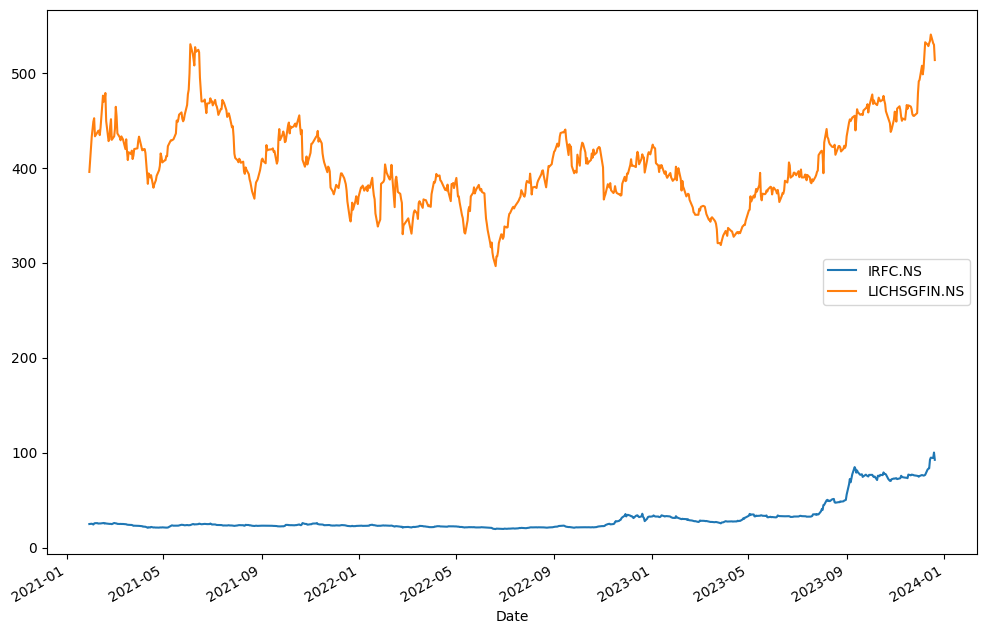

In [ ]:
stocks['Close'].plot(figsize=(12,8))
plt.show()

# interactive charts with plotly and cufflinks


In [ ]:
px.line(stocks,y='Close').show()

In [ ]:
px.area(stocks,y='Close').show()

In [ ]:
stocks.Close.iplot()

In [ ]:
stocks.Close.iplot(fill=True)

In [ ]:
cf.colors.scales()

In [ ]:
stocks.Close.iplot(fill=True,colorscale="original")

In [ ]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [ ]:
stocks.Close.iplot(fill=True,colorscale="original",theme='solar')

In [ ]:
stocks.Close.iplot(fill=True,colorscale="reds",theme='solar',title="IRFC",xTitle='Stock Price',yTitle='Date')

In [ ]:
stocks

Adj Close                    Close                     High  \
               IRFC.NS LICHSGFIN.NS     IRFC.NS LICHSGFIN.NS     IRFC.NS   
Date                                                                       
2021-01-29   21.363667   372.435516   24.799999   395.700012   25.799999   
2021-02-01   21.622097   407.448395   25.100000   432.899994   25.400000   
2021-02-02   21.320591   415.072174   24.750000   441.000000   25.450001   
2021-02-03   20.889874   422.272430   24.250000   448.649994   24.900000   
2021-02-04   21.837456   425.660767   25.350000   452.250000   25.799999   
...                ...          ...         ...          ...         ...   
2023-12-14   92.650002   533.650024   92.650002   533.650024   96.199997   
2023-12-15   94.699997   540.450012   94.699997   540.450012  100.800003   
2023-12-18   94.349998   531.250000   94.349998   531.250000   96.349998   
2023-12-19  100.099998   529.650024  100.099998   529.650024  101.500000   
2023-12-20   92.449997   513.549988   92.449997   513.549988  104.099998   

                               Low                     Open               \
           LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS     IRFC.NS LICHSGFIN.NS   
Date                                                                       
2021-01-29   416.600006  24.350000   390.000000   24.900000   401.500000   
2021-02-01   449.000000  24.900000   392.500000   25.250000   401.600006   
2021-02-02   455.500000  24.700001   435.850006   25.450001   436.500000   
2021-02-03   451.299988  24.049999   428.299988   24.799999   444.700012   
2021-02-04   457.950012  23.850000   445.750000   24.250000   450.000000   
...                 ...        ...          ...         ...          ...   
2023-12-14   544.500000  84.800003   532.099976   84.949997   535.950012   
2023-12-15   542.000000  94.099998   532.849976   95.000000   541.000000   
2023-12-18   540.400024  91.250000   530.150024   95.900002   540.400024   
2023-12-19   535.450012  94.500000   525.799988   94.949997   531.000000   
2023-12-20   534.000000  91.300003   511.350006  102.199997   530.849976   

               Volume               
              IRFC.NS LICHSGFIN.NS  
Date                                
2021-01-29  381938573     12114900  
2021-02-01   72044464     13821161  
2021-02-02   36735442      9719962  
2021-02-03   45816269     10279238  
2021-02-04   88486029      6190152  
...               ...          ...  
2023-12-14  475975248      2262862  
2023-12-15  325150277      2470309  
2023-12-18  151821592      2255645  
2023-12-19  328191530      1458874  
2023-12-20  263936530      1819791  

[716 rows x 12 columns]

# Spread

In [ ]:
stocks.Close[["LICHSGFIN.NS","IRFC.NS"]].iplot(kind='spread' ,fill=True,colorscale="reds",theme='solar',title="IRFC",xTitle='Stock Price',yTitle='Date')

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# candlesticks

In [ ]:
stocks

Adj Close                   Close                     High  \
              IRFC.NS LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS     IRFC.NS   
Date                                                                     
2021-01-29  21.363665   372.435516  24.799999   395.700012   25.799999   
2021-02-01  21.622099   407.448395  25.100000   432.899994   25.400000   
2021-02-02  21.320595   415.072174  24.750000   441.000000   25.450001   
2021-02-03  20.889875   422.272430  24.250000   448.649994   24.900000   
2021-02-04  21.837458   425.660767  25.350000   452.250000   25.799999   
...               ...          ...        ...          ...         ...   
2023-12-11  82.199997   529.799988  82.199997   529.799988   83.349998   
2023-12-12  83.050003   528.250000  83.050003   528.250000   86.500000   
2023-12-13  83.500000   531.450012  83.500000   531.450012   85.400002   
2023-12-14  92.650002   533.650024  92.650002   533.650024   96.199997   
2023-12-15  94.699997   540.450012  94.699997   540.450012  100.800003   

                               Low                    Open               \
           LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS    IRFC.NS LICHSGFIN.NS   
Date                                                                      
2021-01-29   416.600006  24.350000   390.000000  24.900000   401.500000   
2021-02-01   449.000000  24.900000   392.500000  25.250000   401.600006   
2021-02-02   455.500000  24.700001   435.850006  25.450001   436.500000   
2021-02-03   451.299988  24.049999   428.299988  24.799999   444.700012   
2021-02-04   457.950012  23.850000   445.750000  24.250000   450.000000   
...                 ...        ...          ...        ...          ...   
2023-12-11   540.000000  76.800003   527.500000  77.000000   534.900024   
2023-12-12   533.950012  82.050003   523.049988  84.449997   530.799988   
2023-12-13   535.549988  83.099998   527.500000  84.000000   529.750000   
2023-12-14   544.500000  84.800003   532.099976  84.949997   535.950012   
2023-12-15   542.000000  94.099998   532.849976  95.000000   541.000000   

               Volume               
              IRFC.NS LICHSGFIN.NS  
Date                                
2021-01-29  381938573     12114900  
2021-02-01   72044464     13821161  
2021-02-02   36735442      9719962  
2021-02-03   45816269     10279238  
2021-02-04   88486029      6190152  
...               ...          ...  
2023-12-11  268676897      2154946  
2023-12-12  135491070      1803175  
2023-12-13   84559239      1916635  
2023-12-14  475975248      2262862  
2023-12-15  325150277      2470309  

[713 rows x 12 columns]

In [ ]:
# symbols to outer level and headers to inner lever
irfc = stocks.swaplevel(axis=1)['IRFC.NS'].copy()
irfc

Adj Close      Close        High        Low       Open     Volume
Date                                                                         
2021-01-29  21.363663  24.799999   25.799999  24.350000  24.900000  381938573
2021-02-01  21.622097  25.100000   25.400000  24.900000  25.250000   72044464
2021-02-02  21.320595  24.750000   25.450001  24.700001  25.450001   36735442
2021-02-03  20.889874  24.250000   24.900000  24.049999  24.799999   45816269
2021-02-04  21.837460  25.350000   25.799999  23.850000  24.250000   88486029
...               ...        ...         ...        ...        ...        ...
2023-12-11  82.199997  82.199997   83.349998  76.800003  77.000000  268676897
2023-12-12  83.050003  83.050003   86.500000  82.050003  84.449997  135491070
2023-12-13  83.500000  83.500000   85.400002  83.099998  84.000000   84559239
2023-12-14  92.650002  92.650002   96.199997  84.800003  84.949997  475975248
2023-12-15  94.699997  94.699997  100.800003  94.099998  95.000000  325150277

[713 rows x 6 columns]

In [ ]:
irfc.loc['4-2022'].iplot(kind="candle")

In [ ]:
irfc.loc['4-2022'].iplot(kind="ohlc")

In [ ]:
# resample
weekly = irfc.resample("W-Fri").ohlc()

In [ ]:
weekly

Adj Close                                       Close             \
                 open       high        low      close       open       high   
Date                                                                           
2021-01-29  21.363665  21.363665  21.363665  21.363665  24.799999  24.799999   
2021-02-05  21.622099  22.138962  20.889875  22.138962  25.100000  25.700001   
2021-02-12  22.182032  22.182032  21.794384  21.880529  25.750000  25.750000   
2021-02-19  22.182032  23.029516  22.182032  22.760166  25.750000  25.900000   
2021-02-26  22.445923  22.445923  22.131680  22.131680  25.000000  25.000000   
...               ...        ...        ...        ...        ...        ...   
2023-11-17  73.650002  76.900002  73.099998  76.900002  73.650002  76.900002   
2023-11-24  76.099998  76.849998  76.099998  76.099998  76.099998  76.849998   
2023-12-01  75.599998  75.599998  74.650002  75.400002  75.599998  75.599998   
2023-12-08  76.400002  76.599998  75.800003  76.599998  76.400002  76.599998   
2023-12-15  82.199997  94.699997  82.199997  94.699997  82.199997  94.699997   

                                       High              ...        Low  \
                  low      close       open        high  ...        low   
Date                                                     ...              
2021-01-29  24.799999  24.799999  25.799999   25.799999  ...  24.350000   
2021-02-05  24.250000  25.700001  25.400000   26.200001  ...  23.850000   
2021-02-12  25.299999  25.400000  25.950001   25.950001  ...  25.000000   
2021-02-19  25.299999  25.350000  26.200001   26.200001  ...  24.900000   
2021-02-26  24.650000  24.650000  25.400000   25.400000  ...  24.500000   
...               ...        ...        ...         ...  ...        ...   
2023-11-17  73.099998  76.900002  74.650002   77.599998  ...  72.699997   
2023-11-24  76.099998  76.099998  78.500000   78.500000  ...  75.500000   
2023-12-01  74.650002  75.400002  76.750000   77.250000  ...  74.150002   
2023-12-08  75.800003  76.599998  78.150002   78.150002  ...  74.599998   
2023-12-15  82.199997  94.699997  83.349998  100.800003  ...  76.800003   

                            Open                                      Volume  \
                close       open       high        low      close       open   
Date                                                                           
2021-01-29  24.350000  24.900000  24.900000  24.900000  24.900000  381938573   
2021-02-05  25.549999  25.250000  25.600000  24.250000  25.600000   72044464   
2021-02-12  25.299999  25.900000  25.900000  25.400000  25.500000   28324374   
2021-02-19  25.200001  26.200001  26.200001  25.299999  25.650000   45629832   
2021-02-26  24.500000  25.299999  25.299999  24.850000  24.850000   16652770   
...               ...        ...        ...        ...        ...        ...   
2023-11-17  72.699997  74.599998  74.599998  73.400002  73.400002   21466105   
2023-11-24  75.900002  77.400002  77.400002  76.500000  76.849998   46928842   
2023-12-01  74.800003  76.449997  76.449997  74.949997  74.949997   25080614   
2023-12-08  75.599998  78.000000  78.000000  75.000000  76.099998   54336061   
2023-12-15  94.099998  77.000000  95.000000  77.000000  95.000000  268676897   

                                             
                 high        low      close  
Date                                         
2021-01-29  381938573  381938573  381938573  
2021-02-05   88486029   36735442   56318695  
2021-02-12   33132159   13586295   15658220  
2021-02-19   45629832   14542153   14542153  
2021-02-26   36424500   10958830   36424500  
...               ...        ...        ...  
2023-11-17  116818430   15227424  116818430  
2023-11-24   49893620   21604709   21604709  
2023-12-01   34411168   14635478   34411168  
2023-12-08   54336061   24145206   47322739  
2023-12-15  475975248   84559239  325150277  

[151 rows x 24 columns]

In [ ]:
weekly = irfc.resample("W-Fri").agg({"Open":"first",
                                      "High":"max",
                                      "Low":"min",
                                      "Close":"last"
                                    })

In [ ]:
# usually "W-Fri" goes to friday to go back to monday we use to_offset
weekly.index = weekly.index - to_offset("4d")

In [ ]:
weekly

Open        High        Low      Close
Date                                                   
2021-01-25  24.900000   25.799999  24.350000  24.799999
2021-02-01  25.250000   26.200001  23.850000  25.700001
2021-02-08  25.900000   25.950001  25.000000  25.400000
2021-02-15  26.200001   26.200001  24.900000  25.350000
2021-02-22  25.299999   25.400000  24.500000  24.650000
...               ...         ...        ...        ...
2023-11-13  74.599998   77.599998  72.699997  76.900002
2023-11-20  77.400002   78.500000  75.500000  76.099998
2023-11-27  76.449997   77.250000  74.150002  75.400002
2023-12-04  78.000000   78.150002  74.599998  76.599998
2023-12-11  77.000000  100.800003  76.800003  94.699997

[151 rows x 4 columns]

In [ ]:
weekly.iplot(kind="candle")

# volume data

In [ ]:
irfc

Adj Close      Close        High        Low       Open     Volume
Date                                                                         
2021-01-29  21.363665  24.799999   25.799999  24.350000  24.900000  381938573
2021-02-01  21.622099  25.100000   25.400000  24.900000  25.250000   72044464
2021-02-02  21.320595  24.750000   25.450001  24.700001  25.450001   36735442
2021-02-03  20.889875  24.250000   24.900000  24.049999  24.799999   45816269
2021-02-04  21.837458  25.350000   25.799999  23.850000  24.250000   88486029
...               ...        ...         ...        ...        ...        ...
2023-12-11  82.199997  82.199997   83.349998  76.800003  77.000000  268676897
2023-12-12  83.050003  83.050003   86.500000  82.050003  84.449997  135491070
2023-12-13  83.500000  83.500000   85.400002  83.099998  84.000000   84559239
2023-12-14  92.650002  92.650002   96.199997  84.800003  84.949997  475975248
2023-12-15  94.699997  94.699997  100.800003  94.099998  95.000000  325150277

[713 rows x 6 columns]

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
print(type(qf))
qf

<class 'cufflinks.quant_figure.QuantFig'>


{
    "_d": {
        "close": "Close",
        "high": "High",
        "low": "Low",
        "open": "Open",
        "volume": "Volume"
    },
    "data": {
        "datalegend": true,
        "kind": "candlestick",
        "name": "Trace 1",
        "resample": null,
        "slice": [
            null,
            null
        ]
    },
    "kwargs": {},
    "layout": {
        "annotations": {
            "params": {},
            "values": []
        },
        "margin": {
            "b": 30,
            "l": 30,
            "r": 30,
            "t": 30
        },
        "rangeselector": {
            "visible": false
        },
        "rangeslider": false,
        "shapes": {},
        "showlegend": true
    },
    "panels": {
        "bottom_margin": 0,
        "min_panel_size": 0.15,
        "spacing": 0.08,
        "top_margin": 0.9
    },
    "studies": {},
    "theme": {
        "down_color": "grey",
        "theme": "pearl",
        "up_color": "#17BECF"
    },
    "trend

In [ ]:
qf.iplot(title="IRFC",name="IRFC")

In [ ]:
qf.add_volume(colorchange=True)

In [ ]:
qf.iplot(title="IRFC",name="IRFC")

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/quant_figure.py:1061: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Return calculation manual and functional[upto below python version]

In [ ]:
stocks['Lag'] = stocks['Close'].shift(periods=1)

In [ ]:
stocks

In [ ]:
stocks['Diff'] = stocks['Close'].sub(stocks['Lag'])

In [ ]:
stocks

In [ ]:
stocks['pct_change'] = stocks['Close'].div(stocks['Lag']).sub(1).mul(100)

In [ ]:
stocks

In [ ]:
stocks['pct_change_formula'] = stocks['Close'].pct_change(periods=1).mul(100)

In [ ]:
stocks

In [ ]:
stocks['Diff_formula'] = stocks['Close'].diff(periods=1)

In [ ]:
stocks

In [ ]:
stocks['Return'] = stocks['pct_change']

In [ ]:
stocks

In [ ]:
stocks['Return'].info()

In [ ]:
stocks['pct_change'].plot(figsize=(12,8))

In [ ]:
!python3 --version

Python 3.10.12


# Add some technical indicators

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
# add simple moving averages[sma]
qf.add_sma(periods=20)

In [ ]:
qf.iplot(title="IRFC", name="IRFC")

In [ ]:
# add sma for 50 days
qf.add_sma(periods=50)

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
# add bollingar band with period 20 days and std deviation 2
qf.add_bollinger_bands(periods=20, boll_std=2)

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
# Moving Average Convergence / Divergence (MACD)
qf.add_macd()
# directional movement index (DMI)
qf.add_dmi()

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/ta.py:480: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/ta.py:482: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/ta.py:480: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/suriya/.local/lib/python3.11/site-packages/cufflinks/ta.py:482: FutureWarning:

Se

# Trend lines

In [ ]:
irfc.head()

Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2021-01-29  21.363665  24.799999  25.799999  24.350000  24.900000  381938573
2021-02-01  21.622099  25.100000  25.400000  24.900000  25.250000   72044464
2021-02-02  21.320595  24.750000  25.450001  24.700001  25.450001   36735442
2021-02-03  20.889875  24.250000  24.900000  24.049999  24.799999   45816269
2021-02-04  21.837458  25.350000  25.799999  23.850000  24.250000   88486029

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf.add_trendline(date0="2023-09-01",date1="2023-10-26")

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

# Support and resistance

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf.add_resistance(date="2023-10-17")

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf.add_support(date="2023-10-25")

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

# Creating and Backtesting SMA strategies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use("seaborn-v0_8")

In [ ]:
df = pd.read_csv("./eurusd.csv",parse_dates=['Date'], index_col=['Date'])

In [ ]:
df.head()

price
Date                
2004-01-01  1.258194
2004-01-02  1.258194
2004-01-05  1.268698
2004-01-06  1.272103
2004-01-07  1.264095

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


<Axes: xlabel='Date'>

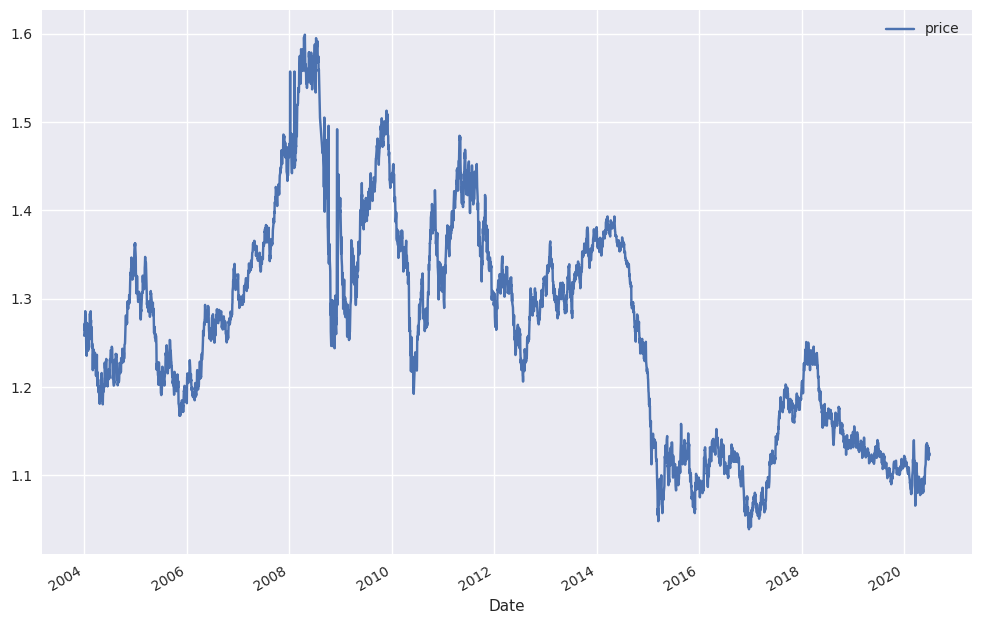

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
df['L_return'] = np.log(df['price'].div(df['price'].shift(1))) # log return
df['S_return'] = df['price'].div(df['price'].shift(1)) # simple return

In [ ]:
df

price  L_return  S_return
Date                                    
2004-01-01  1.258194       NaN       NaN
2004-01-02  1.258194  0.000000  1.000000
2004-01-05  1.268698  0.008313  1.008348
2004-01-06  1.272103  0.002681  1.002684
2004-01-07  1.264095 -0.006315  0.993705
...              ...       ...       ...
2020-06-24  1.131235  0.002892  1.002896
2020-06-25  1.125087 -0.005449  0.994566
2020-06-26  1.122208 -0.002562  0.997441
2020-06-29  1.122586  0.000337  1.000337
2020-06-30  1.124720  0.001899  1.001901

[4275 rows x 3 columns]

<Axes: xlabel='Date'>

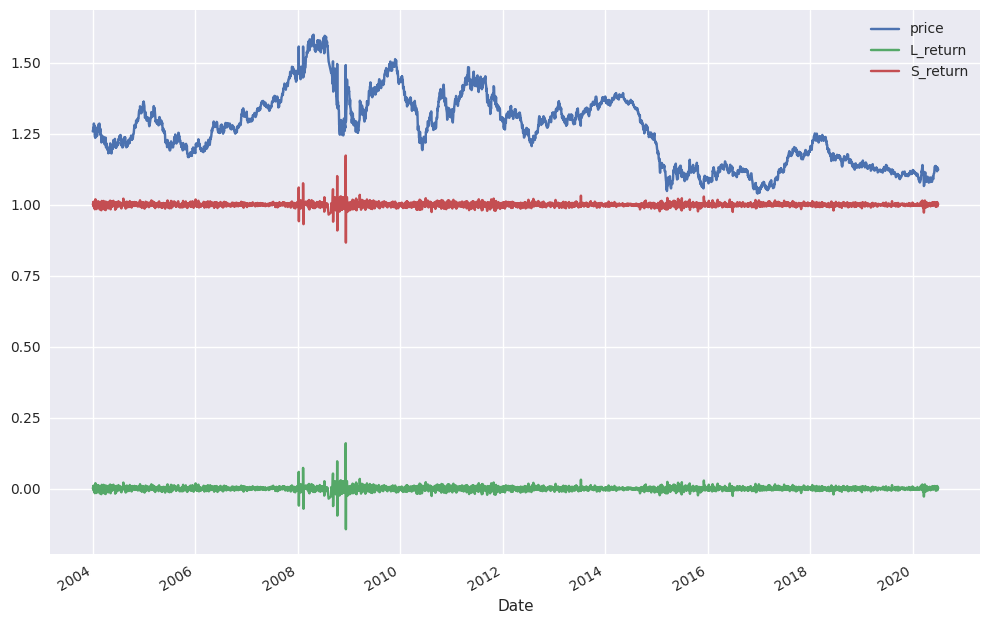

In [ ]:
df.plot(figsize=(12,8))

# simple buy and hold strategy

In [ ]:
df.head()

price  L_return  S_return
Date                                    
2004-01-01  1.258194       NaN       NaN
2004-01-02  1.258194  0.000000  1.000000
2004-01-05  1.268698  0.008313  1.008348
2004-01-06  1.272103  0.002681  1.002684
2004-01-07  1.264095 -0.006315  0.993705

In [ ]:
# drop NaN
df = df.dropna() # or use inplace = True

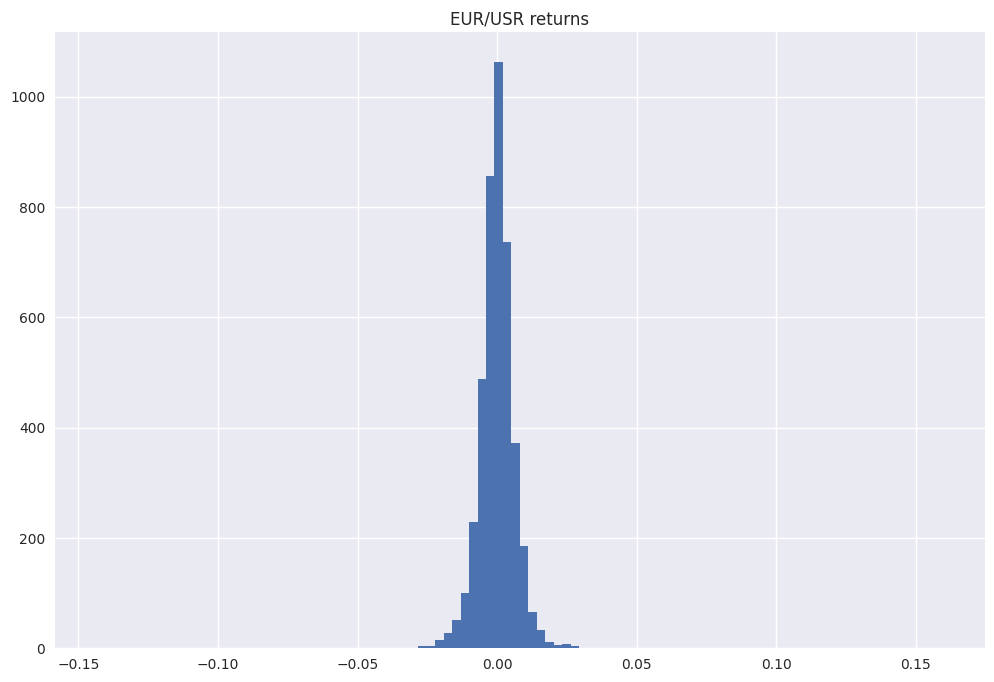

In [ ]:
df.L_return.hist(bins=100, figsize=(12,8))
plt.title("EUR/USR returns")
plt.show()

In [ ]:
df.L_return.sum()

-0.11214302770699758

In [ ]:
# we lost 11%

In [ ]:
np.exp(df.L_return.sum())

0.8939163935445148

In [ ]:
df.price.iloc[-1]/df.price.iloc[0]

0.8939163935445141

In [ ]:
# Above two says the same what price we ended up

In [ ]:
df.L_return.cumsum() # accumulated sum

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2020-06-24   -0.106368
2020-06-25   -0.111817
2020-06-26   -0.114379
2020-06-29   -0.114042
2020-06-30   -0.112143
Name: L_return, Length: 4274, dtype: float64

In [ ]:
df.L_return.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: L_return, Length: 4274, dtype: float64

In [ ]:
df['Creturn'] = df.L_return.cumsum().apply(np.exp)

/tmp/ipykernel_507/326735673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Creturn'] = df.L_return.cumsum().apply(np.exp)


In [ ]:
df

price  L_return  S_return   Creturn
Date                                              
2004-01-02  1.258194  0.000000  1.000000  1.000000
2004-01-05  1.268698  0.008313  1.008348  1.008348
2004-01-06  1.272103  0.002681  1.002684  1.011055
2004-01-07  1.264095 -0.006315  0.993705  1.004690
2004-01-08  1.277498  0.010547  1.010603  1.015343
...              ...       ...       ...       ...
2020-06-24  1.131235  0.002892  1.002896  0.899094
2020-06-25  1.125087 -0.005449  0.994566  0.894208
2020-06-26  1.122208 -0.002562  0.997441  0.891920
2020-06-29  1.122586  0.000337  1.000337  0.892221
2020-06-30  1.124720  0.001899  1.001901  0.893916

[4274 rows x 4 columns]

<Axes: xlabel='Date'>

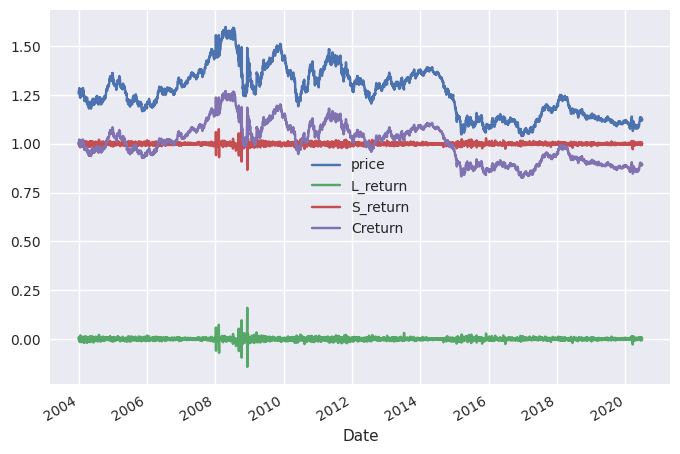

In [ ]:
df.plot()

# more performance returns

In [ ]:
# absolute performance
df.Creturn.iloc[-1]

0.8939163935445149

In [ ]:
# absolute return
df.L_return.sum()

-0.11214302770699758

In [ ]:
df.describe()

price     L_return     S_return      Creturn
count  4274.000000  4274.000000  4274.000000  4274.000000
mean      1.262336    -0.000026     1.000003     1.003292
std       0.122233     0.007593     0.007622     0.097150
min       1.039047    -0.143324     0.866474     0.825824
25%       1.145548    -0.003370     0.996636     0.910470
50%       1.269205     0.000000     1.000000     1.008751
75%       1.348909     0.003361     1.003366     1.072099
max       1.598798     0.159632     1.173079     1.270709

# anualized mean return

In [ ]:
df.L_return.mean() * 252 # mean return 252 ---> typical 252 trading days

-0.006612083056191715

In [ ]:
df.L_return.std() * np.sqrt(252) # std of return for an year(252 trading days)

0.12054120479431406

# maximum drawdown

In [ ]:
df.head()

price  L_return  S_return   Creturn
Date                                              
2004-01-02  1.258194  0.000000  1.000000  1.000000
2004-01-05  1.268698  0.008313  1.008348  1.008348
2004-01-06  1.272103  0.002681  1.002684  1.011055
2004-01-07  1.264095 -0.006315  0.993705  1.004690
2004-01-08  1.277498  0.010547  1.010603  1.015343

In [ ]:
df['cummax'] = df.Creturn.cummax()

/tmp/ipykernel_507/2193656076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cummax'] = df.Creturn.cummax()


In [ ]:
df

price  L_return  S_return   Creturn    cummax
Date                                                        
2004-01-02  1.258194  0.000000  1.000000  1.000000  1.000000
2004-01-05  1.268698  0.008313  1.008348  1.008348  1.008348
2004-01-06  1.272103  0.002681  1.002684  1.011055  1.011055
2004-01-07  1.264095 -0.006315  0.993705  1.004690  1.011055
2004-01-08  1.277498  0.010547  1.010603  1.015343  1.015343
...              ...       ...       ...       ...       ...
2020-06-24  1.131235  0.002892  1.002896  0.899094  1.270709
2020-06-25  1.125087 -0.005449  0.994566  0.894208  1.270709
2020-06-26  1.122208 -0.002562  0.997441  0.891920  1.270709
2020-06-29  1.122586  0.000337  1.000337  0.892221  1.270709
2020-06-30  1.124720  0.001899  1.001901  0.893916  1.270709

[4274 rows x 5 columns]

<Axes: xlabel='Date'>

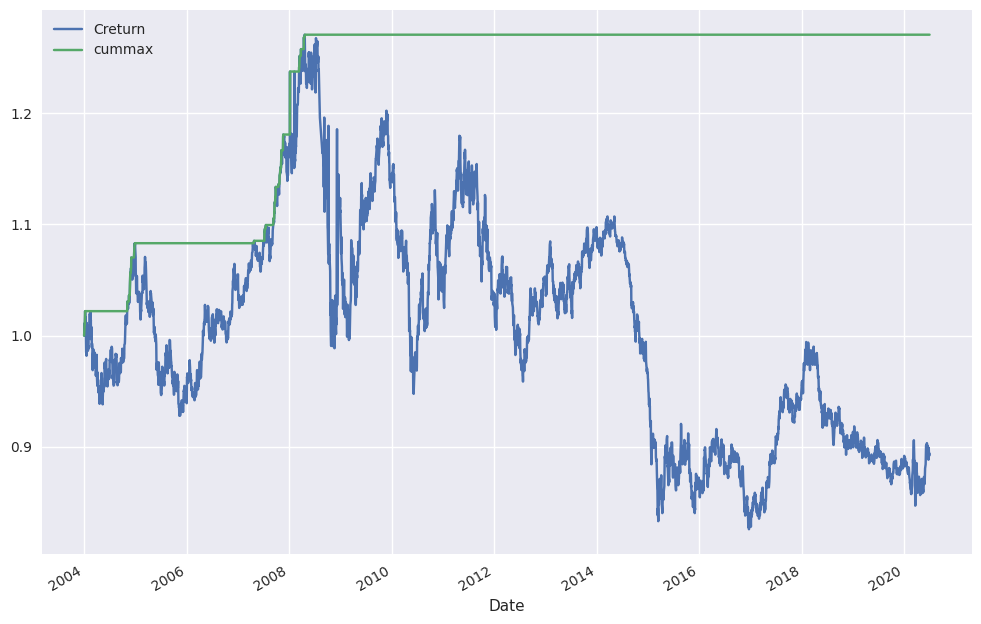

In [ ]:
df[["Creturn","cummax"]].dropna().plot(figsize=(12,8))

In [ ]:
drawdown = df['cummax'] - df['Creturn']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [ ]:
drawdown.max()

0.4448840569933439

In [ ]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

# SMA crossover strategy

In [ ]:
qf = cf.QuantFig(df=irfc.loc['2023'])

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf.add_sma(periods=20)

In [ ]:
qf.iplot(title = "IRFC", name = "IRFC")

In [ ]:
qf.add_sma(periods=100)  # ----> long term SMA
qf.iplot(title = "IRFC", name = "IRFC")

# defining a SMA crossover Strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use("seaborn-v0_8")

In [ ]:
# df = pd.read_csv("./eurusd.csv",parse_dates=['Date'], index_col=['Date'])
tickers = ['IRFC.ns']
start_date = '2021-01-29'
end_date = datetime.date.today()
stocks = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df = df.drop(columns=['High','Low','Adj Close','Volume'])


In [ ]:
sma_s = 40 # short term 50
sma_l = 171 # long term


In [ ]:
df.Close.rolling(50).mean() # moving average calculation

Date
2021-01-29       NaN
2021-02-01       NaN
2021-02-02       NaN
2021-02-03       NaN
2021-02-04       NaN
               ...  
2023-12-14    75.672
2023-12-15    76.034
2023-12-18    76.420
2023-12-19    76.935
2023-12-20    77.287
Name: Close, Length: 716, dtype: float64

In [ ]:
df['SMA_S'] = df.Close.rolling(sma_s).mean()
df['SMA_L'] = df.Close.rolling(sma_l).mean()

In [ ]:
df

Open       Close     SMA_S      SMA_L
Date                                                   
2021-01-29   24.900000   24.799999       NaN        NaN
2021-02-01   25.250000   25.100000       NaN        NaN
2021-02-02   25.450001   24.750000       NaN        NaN
2021-02-03   24.799999   24.250000       NaN        NaN
2021-02-04   24.250000   25.350000       NaN        NaN
...                ...         ...       ...        ...
2023-12-14   84.949997   92.650002  75.80875  52.066374
2023-12-15   95.000000   94.699997  76.19750  52.459649
2023-12-18   95.900002   94.349998  76.61875  52.850292
2023-12-19   94.949997  100.099998  77.18125  53.274269
2023-12-20  102.199997   92.449997  77.56625  53.654971

[716 rows x 4 columns]

In [ ]:
df.iplot(title = "EUR/USD - SMA {} | SMA {}".format(sma_s,sma_l), name = "Price")

AttributeError: ignored

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['position'] = np.where(df['SMA_S'] > df['SMA_L'], 1, -1)

In [ ]:
df

price     SMA_S     SMA_L  position
Date                                              
2004-07-09  1.241897  1.212185  1.227891        -1
2004-07-12  1.240803  1.213333  1.227764        -1
2004-07-13  1.233304  1.214392  1.227583        -1
2004-07-14  1.238497  1.215486  1.227362        -1
2004-07-15  1.235605  1.216466  1.227096        -1
...              ...       ...       ...       ...
2020-06-24  1.131235  1.103047  1.102654         1
2020-06-25  1.125087  1.103905  1.102737         1
2020-06-26  1.122208  1.104801  1.102788         1
2020-06-29  1.122586  1.105777  1.102869         1
2020-06-30  1.124720  1.106698  1.102957         1

[4139 rows x 4 columns]

In [ ]:
df.iplot(secondary_y="position", secondary_y_title="position")

# vectorized back testing

In [ ]:
df

price     SMA_S     SMA_L  position
Date                                              
2004-07-09  1.241897  1.212185  1.227891        -1
2004-07-12  1.240803  1.213333  1.227764        -1
2004-07-13  1.233304  1.214392  1.227583        -1
2004-07-14  1.238497  1.215486  1.227362        -1
2004-07-15  1.235605  1.216466  1.227096        -1
...              ...       ...       ...       ...
2020-06-24  1.131235  1.103047  1.102654         1
2020-06-25  1.125087  1.103905  1.102737         1
2020-06-26  1.122208  1.104801  1.102788         1
2020-06-29  1.122586  1.105777  1.102869         1
2020-06-30  1.124720  1.106698  1.102957         1

[4139 rows x 4 columns]

In [ ]:
df['returns'] = np.log(df.price.div(df.price.shift(1)))
df['strategy'] = df.position.shift(1) * df['returns']

In [ ]:
df

price     SMA_S     SMA_L  position   returns  strategy
Date                                                                  
2004-10-06  1.228094  1.221318  1.226222        -1       NaN       NaN
2004-10-07  1.229906  1.221840  1.226081        -1  0.001475 -0.001475
2004-10-08  1.241003  1.222628  1.225995        -1  0.008982 -0.008982
2004-10-11  1.238405  1.223352  1.225843        -1 -0.002095  0.002095
2004-10-12  1.232104  1.223888  1.225643        -1 -0.005102  0.005102
...              ...       ...       ...       ...       ...       ...
2020-06-24  1.131235  1.101794  1.103430        -1  0.002892 -0.002892
2020-06-25  1.125087  1.102486  1.103540        -1 -0.005449  0.005449
2020-06-26  1.122208  1.103213  1.103627        -1 -0.002562  0.002562
2020-06-29  1.122586  1.103931  1.103730         1  0.000337 -0.000337
2020-06-30  1.124720  1.104695  1.103857         1  0.001899  0.001899

[4076 rows x 6 columns]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[['returns','strategy']].sum() # absolute performance

returns    -0.099105
strategy    0.926912
dtype: float64

In [ ]:
df[['returns','strategy']].sum().apply(np.exp) # absolute performace

returns     0.905647
strategy    2.526694
dtype: float64

In [ ]:
df[['returns','strategy']].mean() * 252  # anualized return

returns    -0.006035
strategy    0.056448
dtype: float64

In [ ]:
df[['returns','strategy']].std() * np.sqrt(252) # anualized risk

returns     0.120418
strategy    0.120366
dtype: float64

In [ ]:
df['creturn'] = df.returns.cumsum().apply(np.exp)
df['cstrategy'] = df.strategy.cumsum().apply(np.exp)

In [ ]:
df

price     SMA_S     SMA_L  position   returns  strategy  \
Date                                                                     
2004-10-07  1.229906  1.221840  1.226081        -1  0.001475 -0.001475   
2004-10-08  1.241003  1.222628  1.225995        -1  0.008982 -0.008982   
2004-10-11  1.238405  1.223352  1.225843        -1 -0.002095  0.002095   
2004-10-12  1.232104  1.223888  1.225643        -1 -0.005102  0.005102   
2004-10-13  1.234903  1.224466  1.225497        -1  0.002270 -0.002270   
...              ...       ...       ...       ...       ...       ...   
2020-06-24  1.131235  1.101794  1.103430        -1  0.002892 -0.002892   
2020-06-25  1.125087  1.102486  1.103540        -1 -0.005449  0.005449   
2020-06-26  1.122208  1.103213  1.103627        -1 -0.002562  0.002562   
2020-06-29  1.122586  1.103931  1.103730         1  0.000337 -0.000337   
2020-06-30  1.124720  1.104695  1.103857         1  0.001899  0.001899   

             creturn  cstrategy  
Date                             
2004-10-07  1.001476   0.998526  
2004-10-08  1.010511   0.989598  
2004-10-11  1.008396   0.991673  
2004-10-12  1.003265   0.996746  
2004-10-13  1.005545   0.994486  
...              ...        ...  
2020-06-24  0.921130   1.271272  
2020-06-25  0.916125   1.278218  
2020-06-26  0.913781   1.281497  
2020-06-29  0.914089   1.281065  
2020-06-30  0.915826   1.283500  

[4075 rows x 8 columns]

In [ ]:
df[['creturn','cstrategy']].iplot()

In [ ]:
outperf = df.cstrategy.iloc[-1] - df.creturn.iloc[-1]

In [ ]:
outperf

1.6210467811232663

# finding a optimal SMA strategy

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [ ]:
# create a function with whatever we did previously
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
    # return data[["returns", "strategy"]].sum().apply(np.exp)#[-1]

In [ ]:
# df = pd.read_csv("./eurusd.csv",parse_dates=['Date'], index_col=['Date'])
tickers = ['IRFC.ns']
start_date = '2021-01-29'
end_date = datetime.date.today()
df = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
run_strategy((50,200))

-4.341255890607611

In [ ]:
a=[(50,200),(20,50)]
for i in a:
    print(i)
    print(run_strategy(i))

(50, 200)
-4.341255890607611
(20, 50)
-2.4710112170921588


In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy,((10,50,1),(100,252,1)))

array([ 48., 192.])

In [ ]:
run_strategy((48,192))

-5.055166300100473

# SMA backtester

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
# Using plotly + cufflinks in offline mode  ----> if enabled plotly won't work
import plotly
import cufflinks as cf

cf.set_config_file(offline=True)

In [ ]:
df = pd.read_csv("./forex_pairs.csv",parse_dates=['Date'],index_col=['Date'])

In [ ]:
df.iplot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [ ]:
import SMABacktester as SMA

In [ ]:
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01","2020-06-30")

In [ ]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [ ]:
tester.test_strategy()

(1.2835, 0.367674)

In [ ]:
tester.results

price   returns     SMA_S     SMA_L  position  strategy  \
Date                                                                     
2004-10-07  1.229906  0.001475  1.221840  1.226081        -1 -0.001475   
2004-10-08  1.241003  0.008982  1.222628  1.225995        -1 -0.008982   
2004-10-11  1.238405 -0.002095  1.223352  1.225843        -1  0.002095   
2004-10-12  1.232104 -0.005102  1.223888  1.225643        -1  0.005102   
2004-10-13  1.234903  0.002270  1.224466  1.225497        -1 -0.002270   
...              ...       ...       ...       ...       ...       ...   
2020-06-24  1.131235  0.002892  1.101794  1.103430        -1 -0.002892   
2020-06-25  1.125087 -0.005449  1.102486  1.103540        -1  0.005449   
2020-06-26  1.122208 -0.002562  1.103213  1.103627        -1  0.002562   
2020-06-29  1.122586  0.000337  1.103931  1.103730         1 -0.000337   
2020-06-30  1.124720  0.001899  1.104695  1.103857         1  0.001899   

            creturns  cstrategy  
Date                             
2004-10-07  1.001476   0.998526  
2004-10-08  1.010511   0.989598  
2004-10-11  1.008396   0.991673  
2004-10-12  1.003265   0.996746  
2004-10-13  1.005545   0.994486  
...              ...        ...  
2020-06-24  0.921130   1.271272  
2020-06-25  0.916125   1.278218  
2020-06-26  0.913781   1.281497  
2020-06-29  0.914089   1.281065  
2020-06-30  0.915826   1.283500  

[4075 rows x 8 columns]

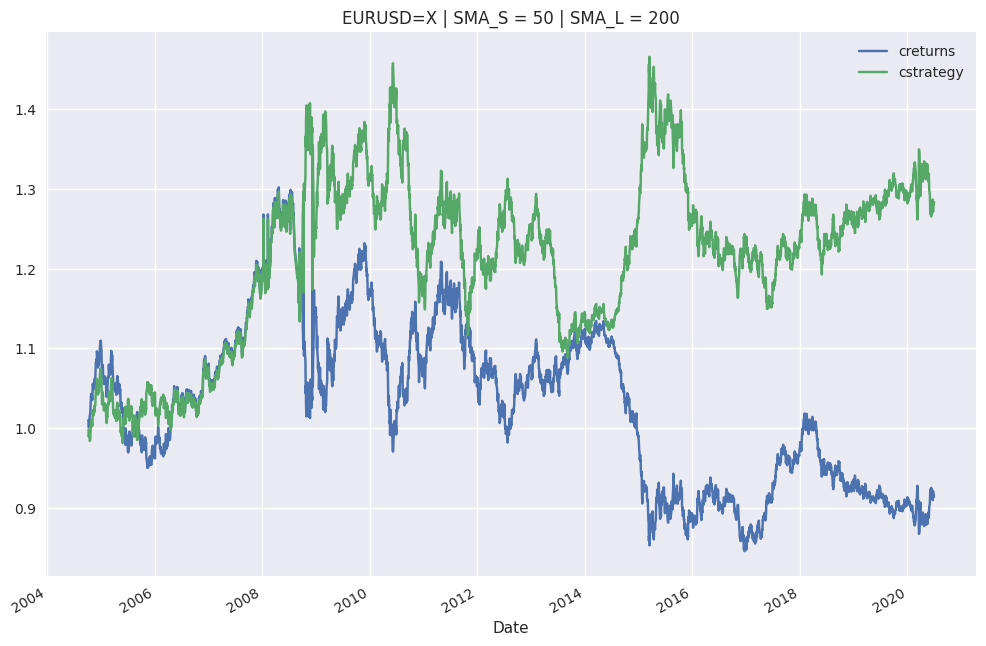

In [ ]:
tester.plot_results()

In [ ]:
tester.set_parameters(22,100)

In [ ]:
tester.test_strategy()

(1.165483, 0.228524)

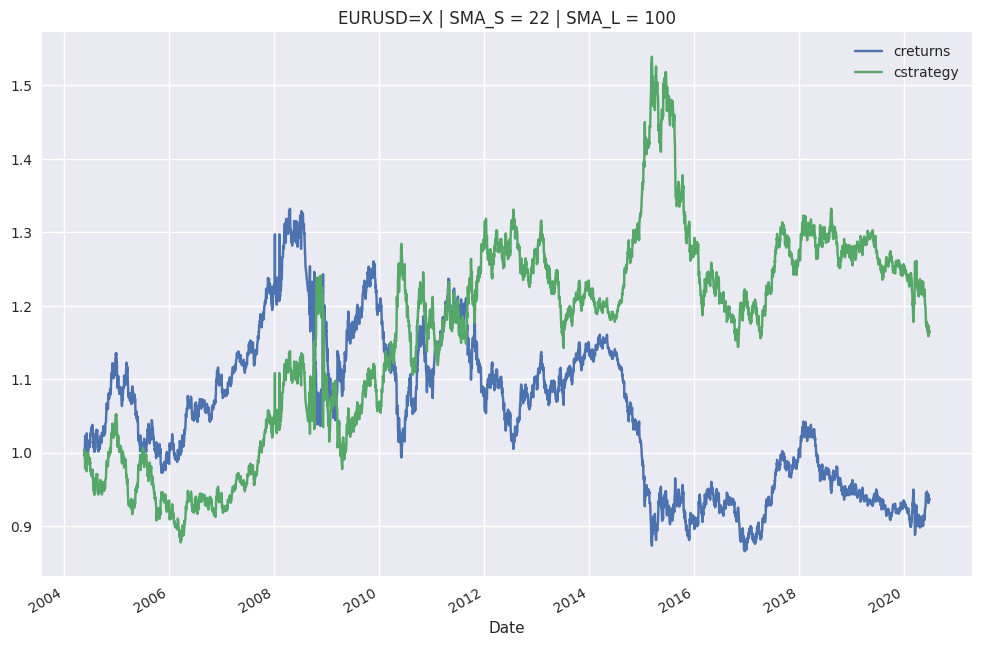

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((25,50,1),(100,200,1))

(array([ 46., 137.]), 2.526694)

# Backtesting and forward testing

In [ ]:
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01","2015-12-31")

In [ ]:
tester.optimize_parameters((25,50,1),(100,200,1))

(array([ 46., 137.]), 2.440535)

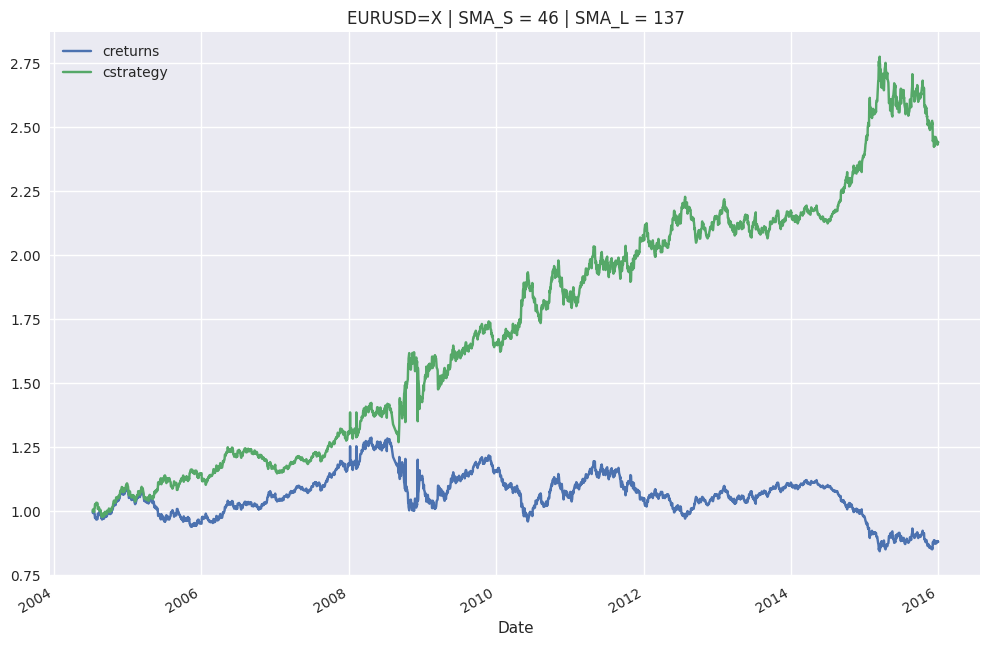

In [ ]:
tester.plot_results()

In [ ]:
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01","2020-06-30")

In [ ]:
tester.test_strategy()

(1.056731, 0.038331)

In [ ]:
tickers = ['IRFC.ns']
start_date = '2021-12-22'
end_date = datetime.date.today()
stocks = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1h")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stocks

Open        High        Low       Close  \
Datetime                                                                   
2021-12-22 09:15:00+05:30   22.650000   22.700001  22.549999   22.650000   
2021-12-22 10:15:00+05:30   22.650000   22.700001  22.549999   22.650000   
2021-12-22 11:15:00+05:30   22.700001   22.700001  22.650000   22.700001   
2021-12-22 12:15:00+05:30   22.700001   22.700001  22.400000   22.500000   
2021-12-22 13:15:00+05:30   22.500000   22.549999  22.450001   22.549999   
...                               ...         ...        ...         ...   
2023-12-20 11:15:00+05:30  101.300003  101.349998  99.750000  100.400002   
2023-12-20 12:15:00+05:30  100.400002  100.400002  97.650002   98.000000   
2023-12-20 13:15:00+05:30   97.949997   98.000000  91.400002   93.900002   
2023-12-20 14:15:00+05:30   93.800003   95.300003  92.599998   92.650002   
2023-12-20 15:15:00+05:30   92.599998   92.650002  91.699997   92.500000   

                            Adj Close    Volume  
Datetime                                         
2021-12-22 09:15:00+05:30   22.650000         0  
2021-12-22 10:15:00+05:30   22.650000    782190  
2021-12-22 11:15:00+05:30   22.700001    218958  
2021-12-22 12:15:00+05:30   22.500000   2282718  
2021-12-22 13:15:00+05:30   22.549999    919983  
...                               ...       ...  
2023-12-20 11:15:00+05:30  100.400002  18735590  
2023-12-20 12:15:00+05:30   98.000000  21948427  
2023-12-20 13:15:00+05:30   93.900002  74252279  
2023-12-20 14:15:00+05:30   92.650002  39864397  
2023-12-20 15:15:00+05:30   92.500000  18882739  

[3452 rows x 6 columns]

<Axes: xlabel='Datetime'>

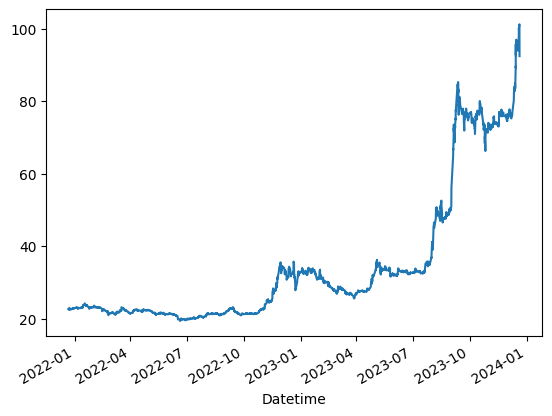

In [ ]:
stocks['Close'].plot()

In [ ]:
# Importing models to be used
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split

#Importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
stocks.shape

(3452, 6)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(stocks[['Close','Volume']], stocks['Close'], test_size=0.5,shuffle=False)

In [ ]:
Xtrain

Close   Volume
Datetime                                     
2021-12-22 09:15:00+05:30  22.650000        0
2021-12-22 10:15:00+05:30  22.650000   782190
2021-12-22 11:15:00+05:30  22.700001   218958
2021-12-22 12:15:00+05:30  22.500000  2282718
2021-12-22 13:15:00+05:30  22.549999   919983
...                              ...      ...
2022-12-19 14:15:00+05:30  32.900002  3970863
2022-12-19 15:15:00+05:30  32.799999  3271923
2022-12-20 09:15:00+05:30  33.049999        0
2022-12-20 10:15:00+05:30  33.049999  6495336
2022-12-20 11:15:00+05:30  33.299999  9267413

[1726 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
scaler.transform(Xtrain)
scaler.transform(Xtest)

array([[ 3.29325815,  1.41852623],
       [ 3.52427663,  4.33135486],
       [ 3.94010943, 14.1723231 ],
       ...,
       [21.8979471 , 12.14613563],
       [21.5129163 ,  6.36863434],
       [21.46671213,  2.84351011]])

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,random_state=50)
regressor.fit(Xtrain, ytrain)
y_pred = regressor.predict(Xtest)
mae = mean_absolute_error(ytest, y_pred)
rsqr = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

In [ ]:
print(mae, rsqr, mse, rmse)

13.602042123953684 -0.2540747805204777 543.3131571875429 23.309078857551253


<Axes: xlabel='Datetime'>

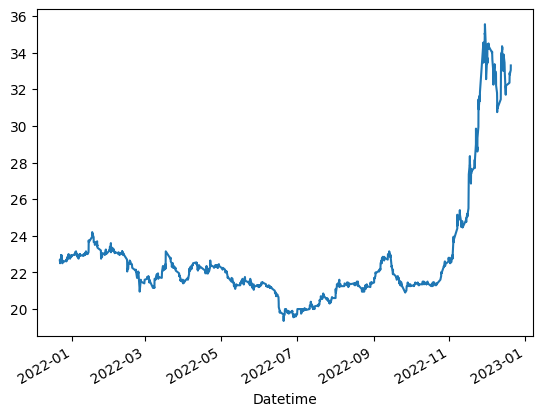

In [ ]:
ytrain.plot()

In [ ]:
y_pred

array([33.48900017, 34.23250023, 35.38599926, ..., 35.38599926,
       35.38599926, 35.25049934])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

[*********************100%%**********************]  1 of 1 completed
MAE: 0.9334086120415609
MSE: 3.183597034724941
RMSE: 1.7842637234234577
r^2:  0.9925429917315642


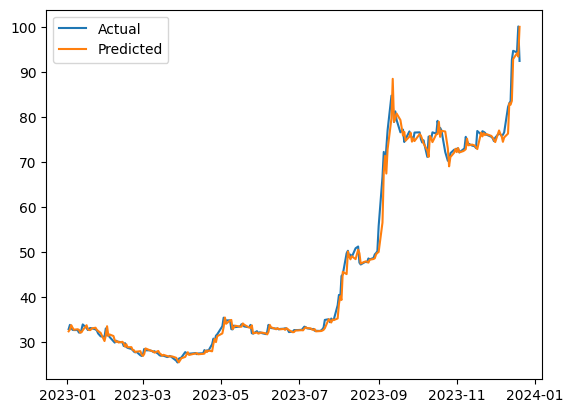

In [ ]:
# prompt: regression model for stock data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the stock data
tickers = ['IRFC.ns']
start_date = '2021-01-01'
end_date = datetime.date.today()
stocks = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1d")
stocks['Lag'] = stocks['Close'].shift(periods=1)
stocks['Lag_3'] = stocks['Close'].shift(periods=3)
stocks['Lag_5'] = stocks['Close'].shift(periods=5)
stocks.dropna(inplace=True)

# Create the features and target variables
features = ['Open','Lag','Lag_3','Lag_5']#,  'Volume'] #stocks[['Open', 'High', 'Low', 'Volume']]
target = ['Close'] #stocks['Close']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=False)
X_train = stocks.loc[:'2022-12',features]
X_test =  stocks.loc['2023-01':,features]
y_train = stocks.loc[:'2022-12',target]
y_test =  stocks.loc['2023-01':,target]

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_test['Close_pred'] = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test['Close_pred'], y_test['Close'])
mse = mean_squared_error(y_test['Close_pred'], y_test['Close'])
rmse = np.sqrt(mse)
rsqr = r2_score(y_test['Close_pred'], y_test['Close'])
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('r^2: ',rsqr)
# Plot the predictions
plt.plot(y_test['Close'], label='Actual')
plt.plot(y_test['Close_pred'], label='Predicted')
plt.legend()
plt.show()


In [ ]:
model.predict(pd.DataFrame({'Open':[102.20],'Lag':[100.10],'Lag_3':[94.70],'Lag_5': [83.50]}))

array([[100.01403941]])

In [ ]:
stocks = yf.download(tickers=tickers,start = start_date, end = end_date,interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stocks['Close'].shift(periods=5)

Date
2021-01-29          NaN
2021-02-01          NaN
2021-02-02          NaN
2021-02-03          NaN
2021-02-04          NaN
                ...    
2023-12-14    76.050003
2023-12-15    76.599998
2023-12-18    82.199997
2023-12-19    83.050003
2023-12-20    83.500000
Name: Close, Length: 716, dtype: float64